In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
def read():
    image_name = input("Emter image name: ")
    image = cv.imread(image_name)
    #image = Image.open(image_name) alternative with pillow
    return image

def save(image):
    new_file_name = input("Enter new file name: ")   
    cv.imwrite(new_file_name, image)

def show(image):
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(12,12))
    plt.imshow(image_rgb)
    plt.show()

def crop(image):
    x_range = [int(x) for x in input("Enter two values (x axis range): ").split()]
    y_range = [int(y) for y in input("Enter two values (y axis range): ").split()]
    image_croped = image[x_range[0]:x_range[1], y_range[0]:y_range[1]] 
    return image_croped

def gray_scale(image):
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image_gray

def show_hist(image): #has to be grayscale?
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    plt.hist(image_rgb.ravel(),256,[0,256], color='black')
    plt.show()

Emter image name: venice.jpg


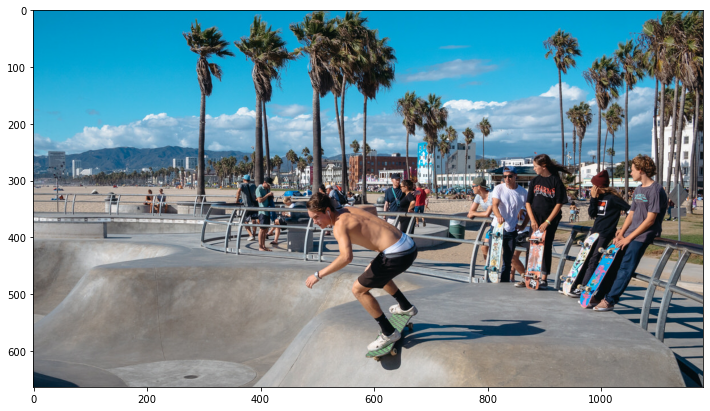

In [3]:
image = read()
show(image)

Enter two values (x axis range): 200 400
Enter two values (y axis range): 200 400


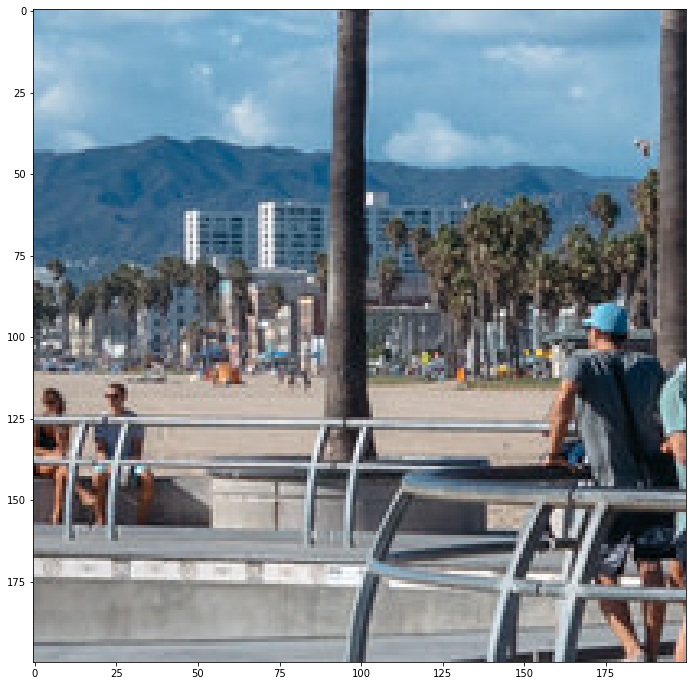

In [4]:
croped_image = crop(image)
show(croped_image)

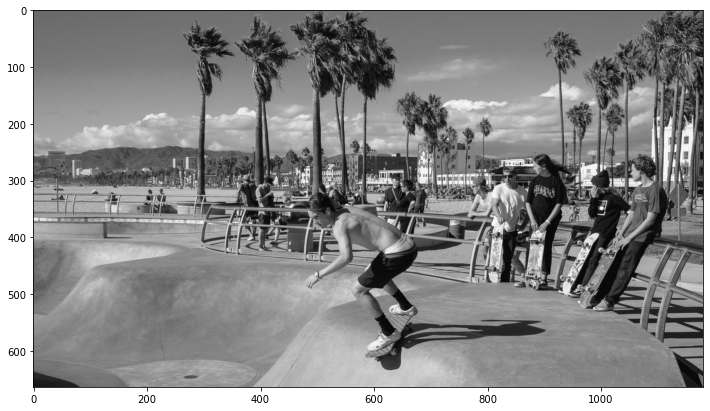

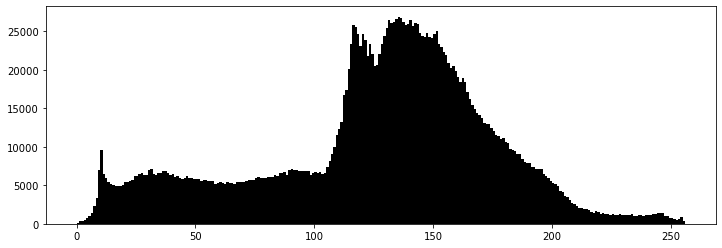

In [5]:
gray_image = gray_scale(image)
show(gray_image)
show_hist(gray_image)

In [6]:
def point_trans_const(image, const): #automatycznie dostaje sie do piksela
    image = image.astype(np.float32) / 255
    trans_image = image * const
    trans_image = np.clip(trans_image, 0, 1)
    norm_image = cv.normalize(trans_image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    trans_image = norm_image.astype(np.uint8)
    return trans_image

def point_trans_contrast_dynamic(image, m, e):
    image = image.astype(np.float32) / 255
    trans_image = 1/(1+(m/image)**e)
    norm_image = cv.normalize(trans_image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    trans_image = norm_image.astype(np.uint8)
    return trans_image

def point_trans_gamma(image, const, gamma):
    image = image.astype(np.float32) / 255
    trans_image = (image**gamma)*const
    norm_image = cv.normalize(trans_image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    trans_image = norm_image.astype(np.uint8)
    return trans_image
    
    

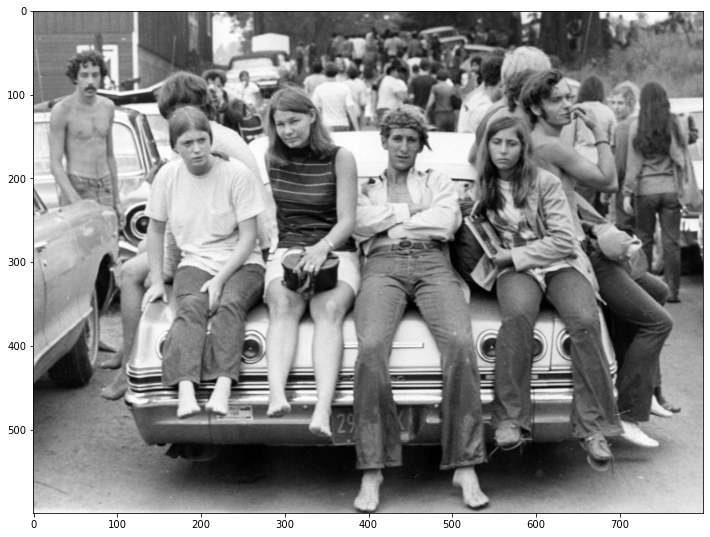

[[[142 142 142]
  [133 133 133]
  [130 130 130]
  ...
  [179 179 179]
  [182 182 182]
  [179 179 179]]

 [[141 141 141]
  [131 131 131]
  [128 128 128]
  ...
  [166 166 166]
  [169 169 169]
  [167 167 167]]

 [[141 141 141]
  [132 132 132]
  [130 130 130]
  ...
  [152 152 152]
  [156 156 156]
  [156 156 156]]

 ...

 [[237 237 237]
  [239 239 239]
  [242 242 242]
  ...
  [227 227 227]
  [228 228 228]
  [228 228 228]]

 [[243 243 243]
  [245 245 245]
  [247 247 247]
  ...
  [229 229 229]
  [229 229 229]
  [229 229 229]]

 [[248 248 248]
  [248 248 248]
  [247 247 247]
  ...
  [230 230 230]
  [231 231 231]
  [230 230 230]]]


In [7]:
image = cv.imread("wood.jpg")
show(image)
print(image)

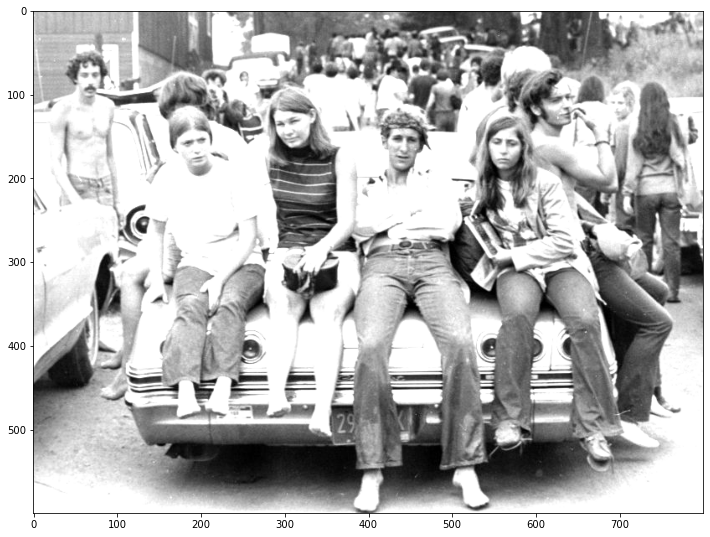

[[[213 213 213]
  [199 199 199]
  [195 195 195]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[211 211 211]
  [196 196 196]
  [192 192 192]
  ...
  [249 249 249]
  [253 253 253]
  [250 250 250]]

 [[211 211 211]
  [198 198 198]
  [195 195 195]
  ...
  [228 228 228]
  [234 234 234]
  [234 234 234]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [8]:
trans_image = point_trans_const(image, 1.5)
show(trans_image)
print(trans_image)

C:\Users\wikto\AppData\Local\Temp/ipykernel_23444/1711873101.py:11: RuntimeWarning: divide by zero encountered in true_divide
  trans_image = 1/(1+(m/image)**e)


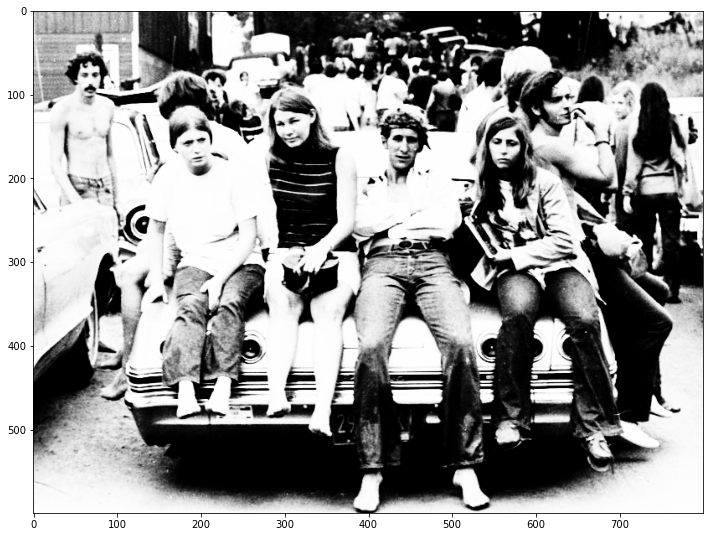

In [9]:
trans_image = point_trans_contrast_dynamic(image, 0.45, 8)
show(trans_image)

C:\Users\wikto\AppData\Local\Temp/ipykernel_23444/1711873101.py:11: RuntimeWarning: divide by zero encountered in true_divide
  trans_image = 1/(1+(m/image)**e)


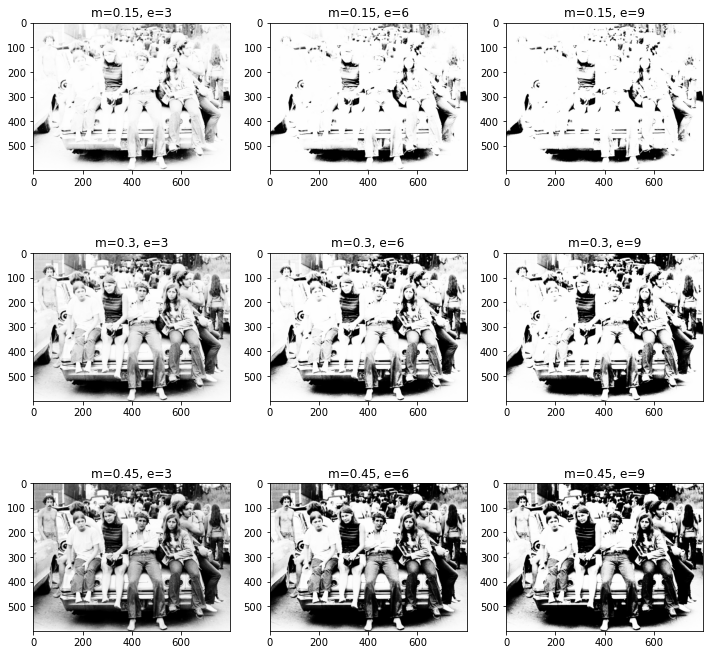

In [10]:
plt.figure(figsize=(12,12))
m = 0
e = 0
for i in range (0,3):
    m = m + 0.15
    e = 0
    for j in range (1,4):
        e = e + 3
        trans_image = point_trans_contrast_dynamic(image, m, e)
        plt.subplot(330 + (i*3)+j)
        plt.imshow(trans_image)
        plt.title(f"m={round(m, 3)}, e={e}")

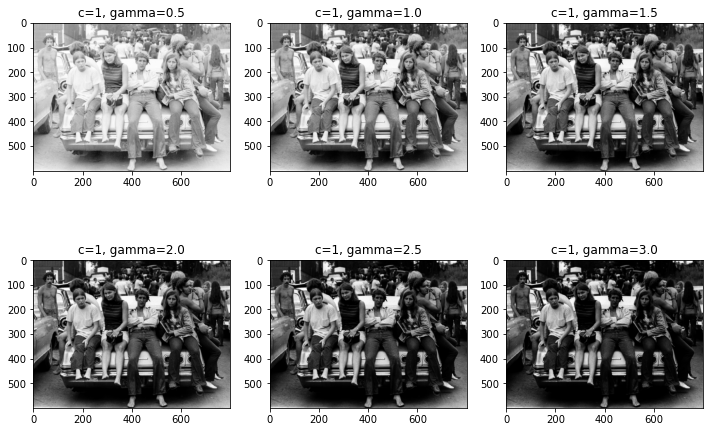

In [11]:
plt.figure(figsize=(12,8))
c = 1
gamma = 0
for i in range (0,2):
    #c = c + 0.5
    #gamma = 0
    for j in range (1,4):
        gamma = gamma + 0.5
        trans_image = point_trans_gamma(image, c, gamma)
        plt.subplot(230 + (i*3)+j)
        plt.imshow(trans_image)
        plt.title(f"c={round(c, 3)}, gamma={round(gamma, 3)}")

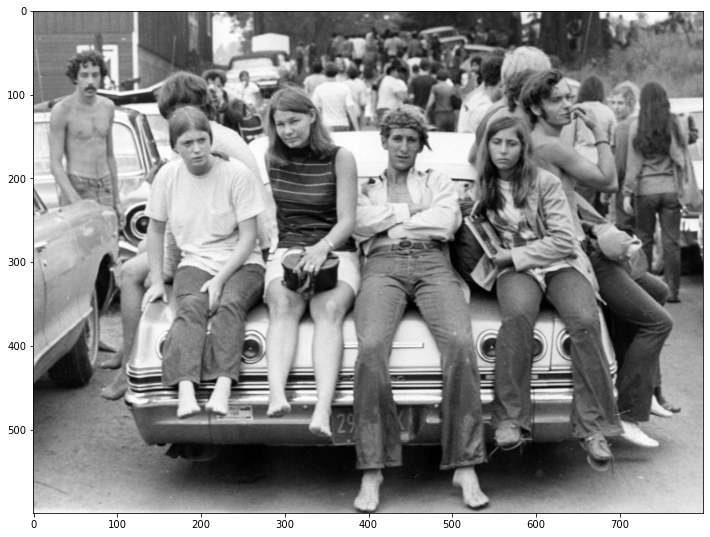

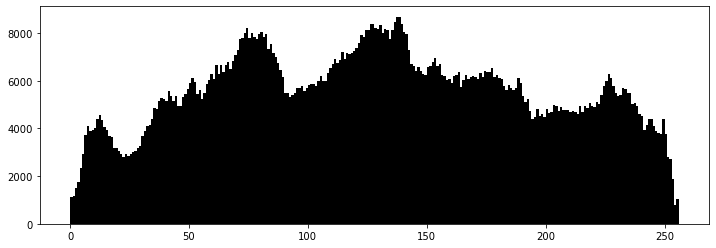

In [12]:
image = cv.imread("wood.jpg")
image = gray_scale(image)
show(image)
show_hist(image)

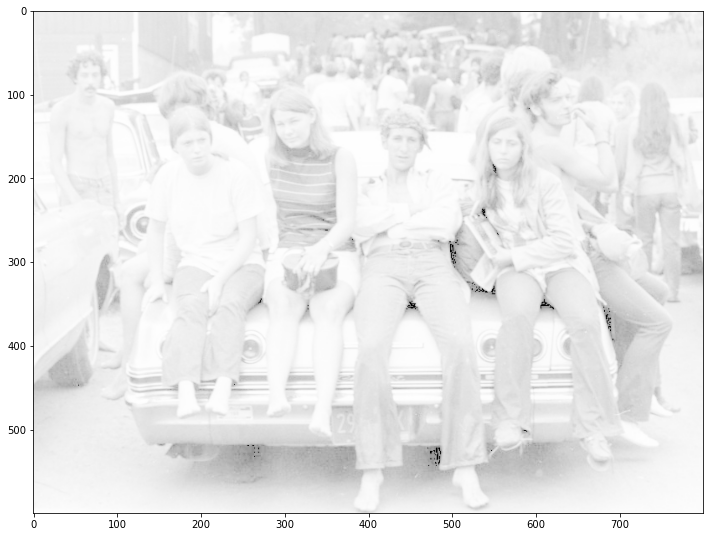

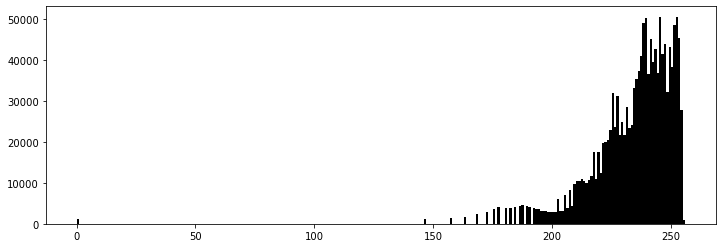

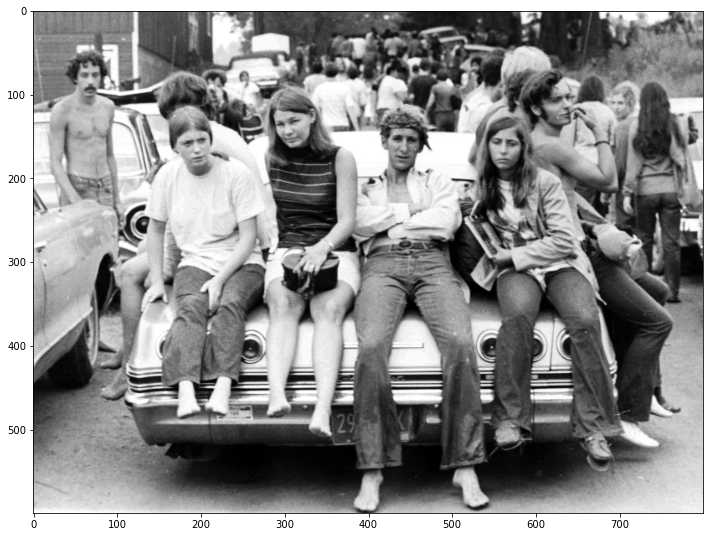

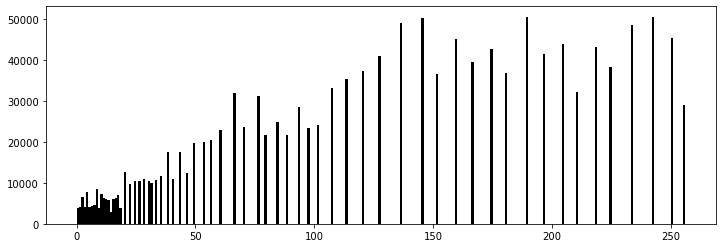

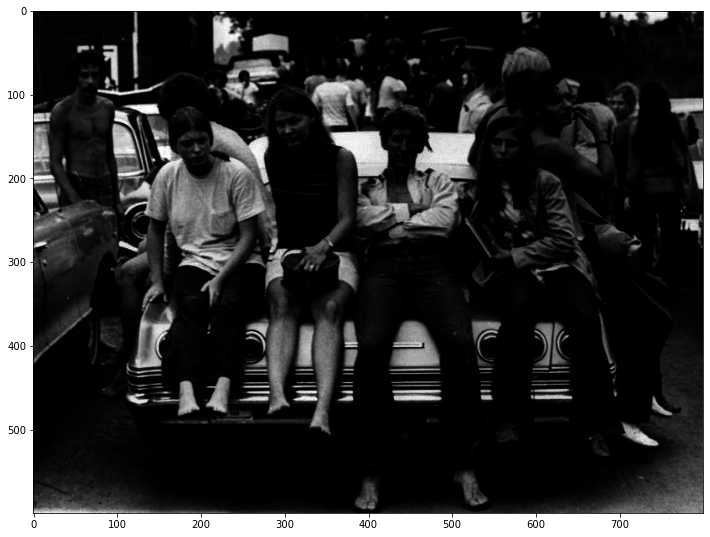

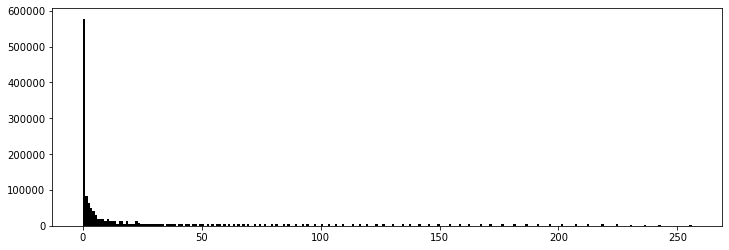

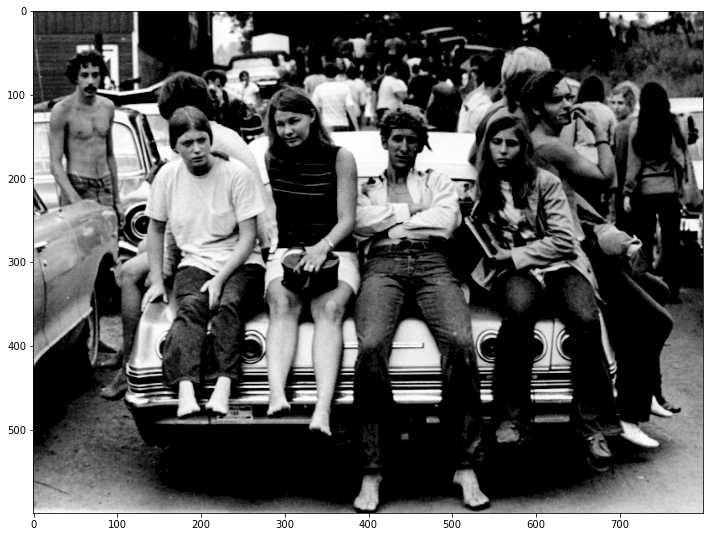

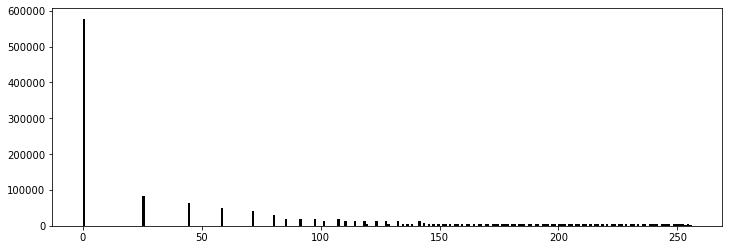

In [13]:
image_bright = point_trans_gamma(image, 1, 0.1)
show(image_bright)
show_hist(image_bright)

image_equalized = cv.equalizeHist(image_bright)
show(image_equalized)
show_hist(image_equalized)

image_dark = point_trans_gamma(image, 1, 6.5)
show(image_dark)
show_hist(image_dark)

image_equalized = cv.equalizeHist(image_dark)
show(image_equalized)
show_hist(image_equalized)

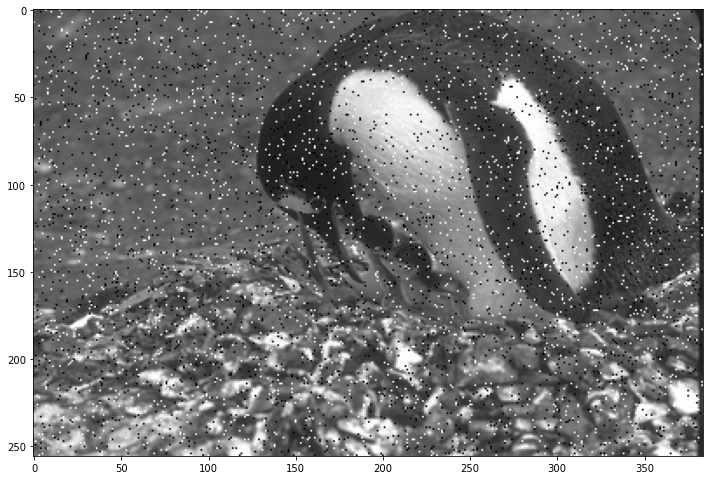

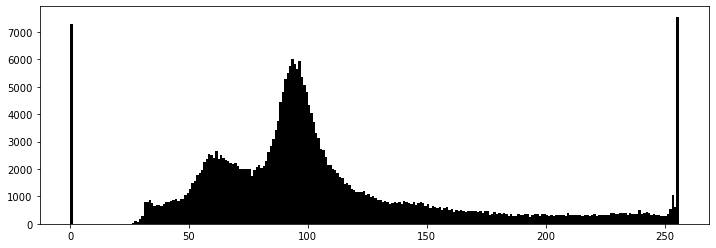

In [14]:
image = cv.imread("noise.png")
#image = gray_scale(image)
show(image)
show_hist(image)

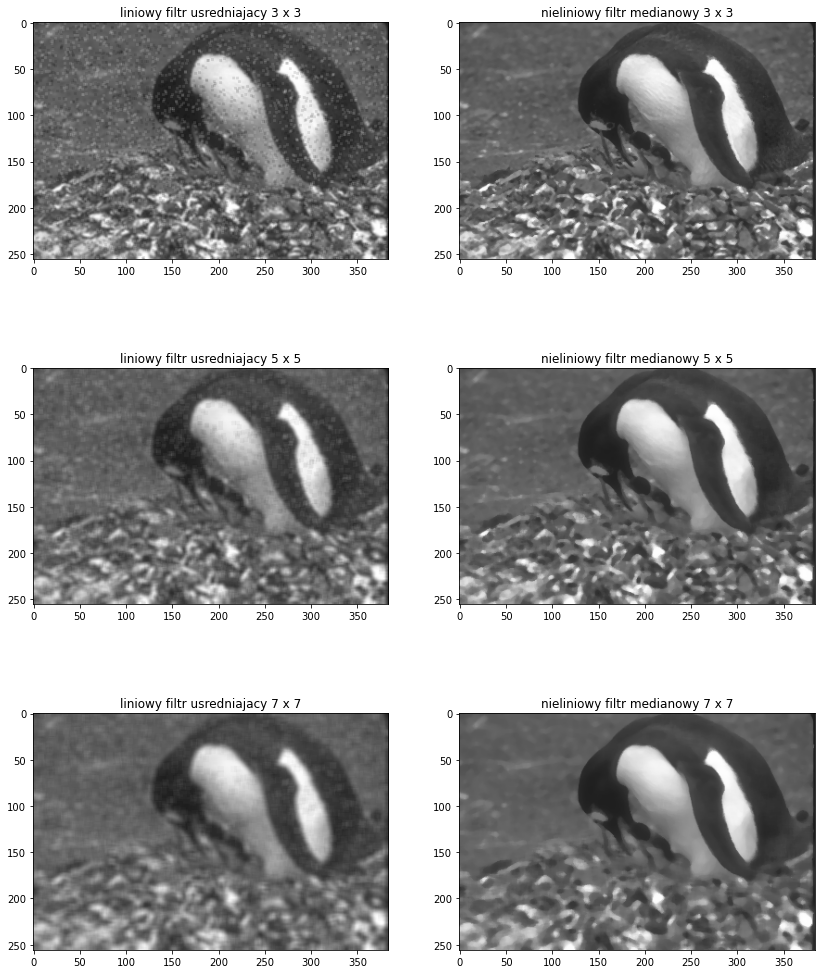

In [15]:
plt.figure(figsize=(14,18))
mask_size = 1
for i in range (0,3):
    mask_size = mask_size + 2
    
    filtered_image = cv.blur(image, (mask_size, mask_size))
    plt.subplot(320 + (i*2)+1)
    plt.imshow(filtered_image)
    plt.title(f"liniowy filtr usredniajacy {mask_size} x {mask_size}")
        
    filtered_image = cv.medianBlur(image, mask_size)
    plt.subplot(320 + (i*2)+2)
    plt.imshow(filtered_image)
    plt.title(f"nieliniowy filtr medianowy {mask_size} x {mask_size}")

Text(0.5, 1.0, 'sobel mask horizontal')

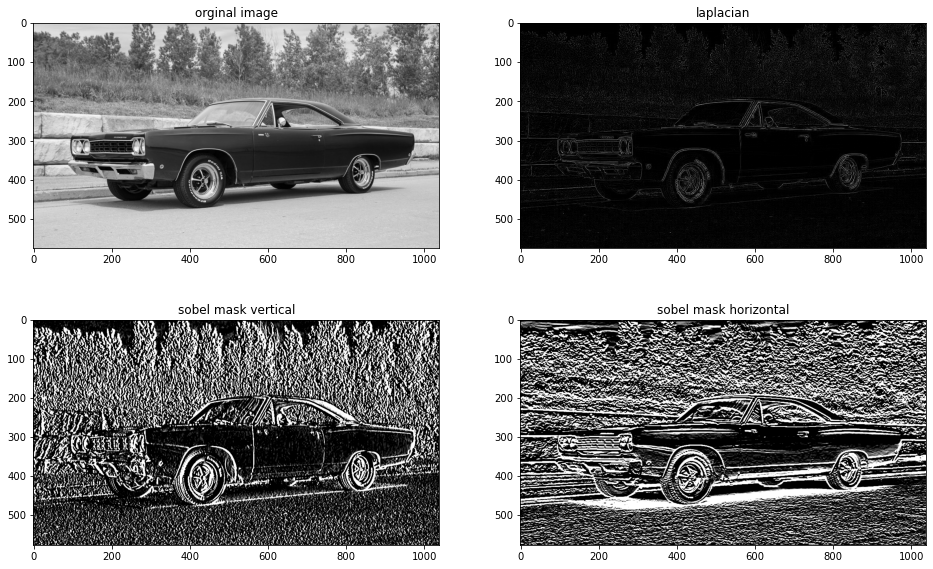

In [16]:
image = cv.imread("plymouth.jpg")
image = image.astype(np.uint8)

image = gray_scale(image)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.imshow(image)
plt.title("orginal image")

plt.subplot(222)
plt.imshow(cv.Laplacian(image, cv.CV_8U))
plt.title("laplacian")

plt.subplot(223)
plt.imshow(cv.Sobel(image, cv.CV_8U, 1, 0, ksize=5))
plt.title("sobel mask vertical")

plt.subplot(224)
plt.imshow(cv.Sobel(image, cv.CV_8U, 0, 1, ksize=5))
plt.title("sobel mask horizontal")